### Elevation profiles extracted from SRTM over Mt Baker compared with ICESat-2

In [2]:
import numpy as np
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import glob
from topolib import gda_lib
import topolib
import gdal

### Read reference DEM

In [49]:
# dem_fn = '/home/jovyan/data/srtm_elevation/SRTM3/cache/srtm_wa_subset.vrt'
# dem_fn = '/home/jovyan/data/baker_1_m/baker_2015_utm_m.vrt'
# dem = rasterio.open(dem_fn)

### Read ATL06 data

In [50]:
data_dir = '/home/jovyan/data/nsidc/**/'
ATL06_list = sorted(glob.glob(data_dir + "*.h5"))

### Extract points from NED

In [51]:
ATL06_fn = ATL06_list[0]
dataset_dict={'land_ice_segments':['h_li',
                                   'delta_time',
                                   'longitude',
                                   'latitude'],
              'land_ice_segments/ground_track':['x_atc']}

ATL06_gdf = gda_lib.ATL06_2_gdf(ATL06_fn,dataset_dict)

In [52]:
ATL06_gdf.head()

,h_li,delta_time,longitude,latitude,pair,beam,p_b,geometry
0,881.312744,2.522621e+07,-121.871270,48.700353,1.0,0.0,1.0_0.0,POINT (-121.8712698055161 48.70035295193843)
1,991.491089,2.522621e+07,-121.871498,48.701968,1.0,0.0,1.0_0.0,POINT (-121.8714979934935 48.7019675199616)
2,1082.476440,2.522621e+07,-121.871683,48.703223,1.0,0.0,1.0_0.0,POINT (-121.8716827998666 48.70322282685757)
3,NaN,2.522621e+07,-121.871883,48.704655,1.0,0.0,1.0_0.0,POINT (-121.8718833403367 48.70465508248594)
4,NaN,2.522621e+07,-121.871913,48.704837,1.0,0.0,1.0_0.0,POINT (-121.8719128466406 48.70483727673248)


In [53]:
from pygeotools.lib import geolib

In [54]:
ned_elevs = []

lons = list(ATL06_gdf['longitude'].values)
lats = list(ATL06_gdf['latitude'].values)


In [55]:
len(lons)

3860

In [56]:
len(ned_elevs)

0

In [58]:
%%capture
ned_elevs = geolib.get_HAE(lons[0],lats[0])

In [59]:
ned_elevs

array(879.463)

In [ ]:
# ATL06_gdf['NED_elev'] = ned_elevs

In [ ]:
ATL06_gdf['NED_ATL06_diff'] = ATL06_gdf['NED_elev'] - glas_gdf_aea_rgi['h_li']

In [ ]:
ATL06_gdf['longtitude'], ATL06_gdf['latitude']

In [ ]:
ATL06_gdf['longtitude']

In [ ]:
glas_df['geometry'] = glas_df['geometry'].apply(geolib.get_NED)

In [2]:
geolib.get_NED?

Signature: geolib.get_NED(lon, lat)
Docstring: <no docstring>
File:      ~/pygeotools/pygeotools/lib/geolib.py
Type:      function


### Sample DEM at ICESat-2 ATL06

In [22]:
ATL06_fn = ATL06_list[0]
dataset_dict={'land_ice_segments':['h_li',
                                   'delta_time',
                                   'longitude',
                                   'latitude'],
              'land_ice_segments/ground_track':['x_atc']}

ATL06_gdf = gda_lib.ATL06_2_gdf(ATL06_fn,dataset_dict)
ATL06_gdf = ATL06_gdf.to_crs(dem.crs)

In [23]:
poly = gda_lib.dem2polygon(dem_fn)

In [24]:
glas_gdf_aea_rgi = gpd.sjoin(ATL06_gdf, poly, op='intersects', how='inner')

In [25]:
points_xy = list(zip(glas_gdf_aea_rgi.geometry.x, glas_gdf_aea_rgi.geometry.y))

refdem_sample = []
for val in dem.sample(points_xy):
    refdem_sample.append(val[0])

### Plot data

In [26]:
glas_gdf_aea_rgi['srtm_height'] = refdem_sample

In [27]:
glas_gdf_aea_rgi['diff'] = glas_gdf_aea_rgi['srtm_height'] - glas_gdf_aea_rgi['h_li']

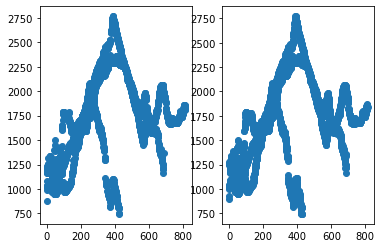

In [28]:
fit,ax = plt.subplots(1,2)
ax[0].scatter(glas_gdf_aea_rgi.index, glas_gdf_aea_rgi['h_li'])
ax[1].scatter(glas_gdf_aea_rgi.index, glas_gdf_aea_rgi['srtm_height']);

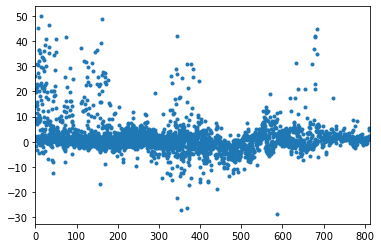

In [29]:
glas_gdf_aea_rgi['diff'].plot(marker='.', linestyle='none');

In [30]:
glas_gdf_aea_rgi['diff'].mean()

1.559596869346697

#### geoid offset

In [35]:
glas_gdf_aea_rgi.total_bounds

array([ 581206.91326115, 5394760.93117372,  589576.38352026,
       5411418.92006629])

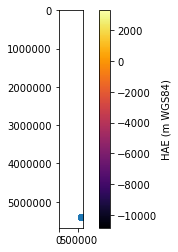

In [34]:
fig,ax = plt.subplots()
im = ax.imshow(dem.read(1),cmap='inferno')
glas_gdf_aea_rgi.plot(ax=ax)
plt.colorbar(im,label='HAE (m WGS84)')

In [43]:
glas_df['geometry'] = glas_df['geometry'].apply(geolib.get_NED)

AttributeError: module 'pygeotools.lib.geolib' has no attribute 'get'

In [ ]:
https://github.com/dshean/pygeotools.git

In [ ]:
ds = gdal.Open('/home/jovyan/data/baker_1_m/baker_2015_dsm_7_wgs84-adj.tif')
ds = gdal.Translate('/home/jovyan/data/baker_1_m/baker_2015_dsm_7_wgs84-adj-sub.tif', ds, projWin = [-121.855968, 48.774327, -121.796142, 48.712009])
ds = None

In [ ]:
%%bash
gdalwarp -r cubic -t_srs EPSG:4326 /home/jovyan/data/baker_1_m/baker_2015_dsm_7_m_utm-adj.tif /home/jovyan/data/baker_1_m/baker_2015_dsm_7_wgs84-adj.tif